In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Case studies I

## Case study 1: Learn how to translate DNA

This will involve **4 tasks**

1. Download only the **sequence** (not header) of DNA (NM_207618.2) as dna.txt and its corresponding protein seq (CDS) as protein.txt from NCBI in FASTA format to computer.

2. Import DNA into python

3. Check that the length of the seq is divisible by 3

4. Import translation table as dictionary

4. Look up each 3-letter string in table and store result

5. Continute look up till you reach end of sequence


## Import DNA into python

This essentially means that you have to read the file. There are two ways to read a file in python

-  Line by line (more memory efficient, but not always useful)

In [ ]:
 filename = "read.txt"
  for line in open(filename):
    print(line)
    line = line.rstrip() # this removes the \n at the end of each line and returns a string. And since strings are immutable, have to reassign
    print(line)
    line = line.rstrip().split(" ") # will split the \n stripped string by " " and return a list 
    print(line)

-  Complete file at once

First confirm if the `pwd` is correct, if not `cd` into that directory from the python console. **_OR_** You can also give complete or relative path to the file instead.

In [9]:
#pwd # make sure the working directory is correct 
inputfile = "./files/dna.txt"
f = open(inputfile,"r") # open the file for reading as f
seq = f.read() # read entire file into variable seq
seq

'GGTCAGAAAAAGCCCTCTCCATGTCTACTCACGATACATCCCTGAAAACCACTGAGGAAGTGGCTTTTCA\nGATCATCTTGCTTTGCCAGTTTGGGGTTGGGACTTTTGCCAATGTATTTCTCTTTGTCTATAATTTCTCT\nCCAATCTCGACTGGTTCTAAACAGAGGCCCAGACAAGTGATTTTAAGACACATGGCTGTGGCCAATGCCT\nTAACTCTCTTCCTCACTATATTTCCAAACAACATGATGACTTTTGCTCCAATTATTCCTCAAACTGACCT\nCAAATGTAAATTAGAATTCTTCACTCGCCTCGTGGCAAGAAGCACAAACTTGTGTTCAACTTGTGTTCTG\nAGTATCCATCAGTTTGTCACACTTGTTCCTGTTAATTCAGGTAAAGGAATACTCAGAGCAAGTGTCACAA\nACATGGCAAGTTATTCTTGTTACAGTTGTTGGTTCTTCAGTGTCTTAAATAACATCTACATTCCAATTAA\nGGTCACTGGTCCACAGTTAACAGACAATAACAATAACTCTAAAAGCAAGTTGTTCTGTTCCACTTCTGAT\nTTCAGTGTAGGCATTGTCTTCTTGAGGTTTGCCCATGATGCCACATTCATGAGCATCATGGTCTGGACCA\nGTGTCTCCATGGTACTTCTCCTCCATAGACATTGTCAGAGAATGCAGTACATATTCACTCTCAATCAGGA\nCCCCAGGGGCCAAGCAGAGACCACAGCAACCCATACTATCCTGATGCTGGTAGTCACATTTGTTGGCTTT\nTATCTTCTAAGTCTTATTTGTATCATCTTTTACACCTATTTTATATATTCTCATCATTCCCTGAGGCATT\nGCAATGACATTTTGGTTTCGGGTTTCCCTACAATTTCTCCTTTACTGTTGACCTTCAGAGACCCTAAGGG\nTCCTTGTTCTGTGTTCTTCAACTGTTGAAAGCCAGAGTCACTAAAAATGCCAAACACAGAAGA

A better way to read the entire file at once is using `with`, which opens a file and uses it for the subsequent block of code only and then closes the file

In [ ]:
inputfile = "./files/dna.txt"
with open(inputfile,"r") as f:
    seq = f.read() # read entire file into variable seq
seq

Notice the `\n` in the printed sequence above ? We need to get rid of it otherwise it will cause problems during translation

In [10]:
print(seq)

GGTCAGAAAAAGCCCTCTCCATGTCTACTCACGATACATCCCTGAAAACCACTGAGGAAGTGGCTTTTCA
GATCATCTTGCTTTGCCAGTTTGGGGTTGGGACTTTTGCCAATGTATTTCTCTTTGTCTATAATTTCTCT
CCAATCTCGACTGGTTCTAAACAGAGGCCCAGACAAGTGATTTTAAGACACATGGCTGTGGCCAATGCCT
TAACTCTCTTCCTCACTATATTTCCAAACAACATGATGACTTTTGCTCCAATTATTCCTCAAACTGACCT
CAAATGTAAATTAGAATTCTTCACTCGCCTCGTGGCAAGAAGCACAAACTTGTGTTCAACTTGTGTTCTG
AGTATCCATCAGTTTGTCACACTTGTTCCTGTTAATTCAGGTAAAGGAATACTCAGAGCAAGTGTCACAA
ACATGGCAAGTTATTCTTGTTACAGTTGTTGGTTCTTCAGTGTCTTAAATAACATCTACATTCCAATTAA
GGTCACTGGTCCACAGTTAACAGACAATAACAATAACTCTAAAAGCAAGTTGTTCTGTTCCACTTCTGAT
TTCAGTGTAGGCATTGTCTTCTTGAGGTTTGCCCATGATGCCACATTCATGAGCATCATGGTCTGGACCA
GTGTCTCCATGGTACTTCTCCTCCATAGACATTGTCAGAGAATGCAGTACATATTCACTCTCAATCAGGA
CCCCAGGGGCCAAGCAGAGACCACAGCAACCCATACTATCCTGATGCTGGTAGTCACATTTGTTGGCTTT
TATCTTCTAAGTCTTATTTGTATCATCTTTTACACCTATTTTATATATTCTCATCATTCCCTGAGGCATT
GCAATGACATTTTGGTTTCGGGTTTCCCTACAATTTCTCCTTTACTGTTGACCTTCAGAGACCCTAAGGG
TCCTTGTTCTGTGTTCTTCAACTGTTGAAAGCCAGAGTCACTAAAAATGCCAAACACAGAAGACAGCTTT
GCTAAT

In [12]:
seq = seq.replace("\n","")
print(seq)

GGTCAGAAAAAGCCCTCTCCATGTCTACTCACGATACATCCCTGAAAACCACTGAGGAAGTGGCTTTTCAGATCATCTTGCTTTGCCAGTTTGGGGTTGGGACTTTTGCCAATGTATTTCTCTTTGTCTATAATTTCTCTCCAATCTCGACTGGTTCTAAACAGAGGCCCAGACAAGTGATTTTAAGACACATGGCTGTGGCCAATGCCTTAACTCTCTTCCTCACTATATTTCCAAACAACATGATGACTTTTGCTCCAATTATTCCTCAAACTGACCTCAAATGTAAATTAGAATTCTTCACTCGCCTCGTGGCAAGAAGCACAAACTTGTGTTCAACTTGTGTTCTGAGTATCCATCAGTTTGTCACACTTGTTCCTGTTAATTCAGGTAAAGGAATACTCAGAGCAAGTGTCACAAACATGGCAAGTTATTCTTGTTACAGTTGTTGGTTCTTCAGTGTCTTAAATAACATCTACATTCCAATTAAGGTCACTGGTCCACAGTTAACAGACAATAACAATAACTCTAAAAGCAAGTTGTTCTGTTCCACTTCTGATTTCAGTGTAGGCATTGTCTTCTTGAGGTTTGCCCATGATGCCACATTCATGAGCATCATGGTCTGGACCAGTGTCTCCATGGTACTTCTCCTCCATAGACATTGTCAGAGAATGCAGTACATATTCACTCTCAATCAGGACCCCAGGGGCCAAGCAGAGACCACAGCAACCCATACTATCCTGATGCTGGTAGTCACATTTGTTGGCTTTTATCTTCTAAGTCTTATTTGTATCATCTTTTACACCTATTTTATATATTCTCATCATTCCCTGAGGCATTGCAATGACATTTTGGTTTCGGGTTTCCCTACAATTTCTCCTTTACTGTTGACCTTCAGAGACCCTAAGGGTCCTTGTTCTGTGTTCTTCAACTGTTGAAAGCCAGAGTCACTAAAAATGCCAAACACAGAAGACAGCTTTGCTAATACCATTAAATACTT

Sometimes return carriage character `\r` is another invisible character that could be present in your copied text. Depending on your editor, you may or may not see it. It is just safer to add a line of code to replace it, just in case

In [13]:
seq = seq.replace("\r","")
print(seq)

GGTCAGAAAAAGCCCTCTCCATGTCTACTCACGATACATCCCTGAAAACCACTGAGGAAGTGGCTTTTCAGATCATCTTGCTTTGCCAGTTTGGGGTTGGGACTTTTGCCAATGTATTTCTCTTTGTCTATAATTTCTCTCCAATCTCGACTGGTTCTAAACAGAGGCCCAGACAAGTGATTTTAAGACACATGGCTGTGGCCAATGCCTTAACTCTCTTCCTCACTATATTTCCAAACAACATGATGACTTTTGCTCCAATTATTCCTCAAACTGACCTCAAATGTAAATTAGAATTCTTCACTCGCCTCGTGGCAAGAAGCACAAACTTGTGTTCAACTTGTGTTCTGAGTATCCATCAGTTTGTCACACTTGTTCCTGTTAATTCAGGTAAAGGAATACTCAGAGCAAGTGTCACAAACATGGCAAGTTATTCTTGTTACAGTTGTTGGTTCTTCAGTGTCTTAAATAACATCTACATTCCAATTAAGGTCACTGGTCCACAGTTAACAGACAATAACAATAACTCTAAAAGCAAGTTGTTCTGTTCCACTTCTGATTTCAGTGTAGGCATTGTCTTCTTGAGGTTTGCCCATGATGCCACATTCATGAGCATCATGGTCTGGACCAGTGTCTCCATGGTACTTCTCCTCCATAGACATTGTCAGAGAATGCAGTACATATTCACTCTCAATCAGGACCCCAGGGGCCAAGCAGAGACCACAGCAACCCATACTATCCTGATGCTGGTAGTCACATTTGTTGGCTTTTATCTTCTAAGTCTTATTTGTATCATCTTTTACACCTATTTTATATATTCTCATCATTCCCTGAGGCATTGCAATGACATTTTGGTTTCGGGTTTCCCTACAATTTCTCCTTTACTGTTGACCTTCAGAGACCCTAAGGGTCCTTGTTCTGTGTTCTTCAACTGTTGAAAGCCAGAGTCACTAAAAATGCCAAACACAGAAGACAGCTTTGCTAATACCATTAAATACTT

In [5]:
def read_seq(inputfilename):
    """Reads and returns the input sequence with special characters removed"""
    with open(inputfilename,"r") as f:
        seq = f.read() # read entire file into variable seq
    seq = seq.replace("\n","")
    seq = seq.replace("\r","")
    return seq

`./files/table.py` contains a pre-made dictionary named table. Copy it here (make sure it is not indented)

In [16]:
table = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
}
#print(table)
# how to traverse a dictionary
table['GAA']

'E'

In [17]:
# or
table["GAA"]

'E'

## Check that the length of the seq is divisible by 3

This can be done using `%` which checks if the remainder is zero.


In [20]:
len(seq) % 3 

2

In [2]:
def translate(seq):
    """Translate a string containing a nucleotide sequence into a string containing the corresponding sequence of amino acids . Nucleotides are translated in triplets using the table dictionary; each amino acid 4 is encoded with a string of length 1"""
    table = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
    }
    
    protein = ""
    if len(seq)%3 == 0:
        for i in range(0, len(seq), 3):
            codon = seq[i: i+3]
            protein += table[codon]
    return(protein)
        
    

In [66]:
# lets test it out
translate("ATA")

'I'

In [56]:
help(translate) # the docstring gives the help menu

Help on function translate in module __main__:

translate(seq)
    Translate a string containing a nt seq into its corresponding protein seq by translating codons using translation table



In [6]:
profilename = "./files/protein.txt"
pro = read_seq(profilename)
pro

'MSTHDTSLKTTEEVAFQIILLCQFGVGTFANVFLFVYNFSPISTGSKQRPRQVILRHMAVANALTLFLTIFPNNMMTFAPIIPQTDLKCKLEFFTRLVARSTNLCSTCVLSIHQFVTLVPVNSGKGILRASVTNMASYSCYSCWFFSVLNNIYIPIKVTGPQLTDNNNNSKSKLFCSTSDFSVGIVFLRFAHDATFMSIMVWTSVSMVLLLHRHCQRMQYIFTLNQDPRGQAETTATHTILMLVVTFVGFYLLSLICIIFYTYFIYSHHSLRHCNDILVSGFPTISPLLLTFRDPKGPCSVFFNC'

In [7]:
dnafilename = "./files/dna.txt"
dna = read_seq(dnafilename)
dna

'GGTCAGAAAAAGCCCTCTCCATGTCTACTCACGATACATCCCTGAAAACCACTGAGGAAGTGGCTTTTCAGATCATCTTGCTTTGCCAGTTTGGGGTTGGGACTTTTGCCAATGTATTTCTCTTTGTCTATAATTTCTCTCCAATCTCGACTGGTTCTAAACAGAGGCCCAGACAAGTGATTTTAAGACACATGGCTGTGGCCAATGCCTTAACTCTCTTCCTCACTATATTTCCAAACAACATGATGACTTTTGCTCCAATTATTCCTCAAACTGACCTCAAATGTAAATTAGAATTCTTCACTCGCCTCGTGGCAAGAAGCACAAACTTGTGTTCAACTTGTGTTCTGAGTATCCATCAGTTTGTCACACTTGTTCCTGTTAATTCAGGTAAAGGAATACTCAGAGCAAGTGTCACAAACATGGCAAGTTATTCTTGTTACAGTTGTTGGTTCTTCAGTGTCTTAAATAACATCTACATTCCAATTAAGGTCACTGGTCCACAGTTAACAGACAATAACAATAACTCTAAAAGCAAGTTGTTCTGTTCCACTTCTGATTTCAGTGTAGGCATTGTCTTCTTGAGGTTTGCCCATGATGCCACATTCATGAGCATCATGGTCTGGACCAGTGTCTCCATGGTACTTCTCCTCCATAGACATTGTCAGAGAATGCAGTACATATTCACTCTCAATCAGGACCCCAGGGGCCAAGCAGAGACCACAGCAACCCATACTATCCTGATGCTGGTAGTCACATTTGTTGGCTTTTATCTTCTAAGTCTTATTTGTATCATCTTTTACACCTATTTTATATATTCTCATCATTCCCTGAGGCATTGCAATGACATTTTGGTTTCGGGTTTCCCTACAATTTCTCCTTTACTGTTGACCTTCAGAGACCCTAAGGGTCCTTGTTCTGTGTTCTTCAACTGTTGAAAGCCAGAGTCACTAAAAATGCCAAACACAGAAGACAGCTTTGCTAATACCATTAAATACT

In [ ]:
translate(dna)

Since our sequence length is not divisible by 3, we don't get anything returned by our function ! Checking with the original NCBI entry, we see that the CDS is actually between 21 - 938 ( 20 - 938 in python indexing)

In [41]:
translate(dna[20:938])

'MSTHDTSLKTTEEVAFQIILLCQFGVGTFANVFLFVYNFSPISTGSKQRPRQVILRHMAVANALTLFLTIFPNNMMTFAPIIPQTDLKCKLEFFTRLVARSTNLCSTCVLSIHQFVTLVPVNSGKGILRASVTNMASYSCYSCWFFSVLNNIYIPIKVTGPQLTDNNNNSKSKLFCSTSDFSVGIVFLRFAHDATFMSIMVWTSVSMVLLLHRHCQRMQYIFTLNQDPRGQAETTATHTILMLVVTFVGFYLLSLICIIFYTYFIYSHHSLRHCNDILVSGFPTISPLLLTFRDPKGPCSVFFNC_'

In [9]:
pro == translate(dna[20:938])

False

Since the stop codon is included in our downloaded (and CDS positions), we see the extra `_` in our translation. So if we remove the last codon, our translation will be identical to that of the NCBI download protein seq

In [42]:
translate(dna[20:935])

'MSTHDTSLKTTEEVAFQIILLCQFGVGTFANVFLFVYNFSPISTGSKQRPRQVILRHMAVANALTLFLTIFPNNMMTFAPIIPQTDLKCKLEFFTRLVARSTNLCSTCVLSIHQFVTLVPVNSGKGILRASVTNMASYSCYSCWFFSVLNNIYIPIKVTGPQLTDNNNNSKSKLFCSTSDFSVGIVFLRFAHDATFMSIMVWTSVSMVLLLHRHCQRMQYIFTLNQDPRGQAETTATHTILMLVVTFVGFYLLSLICIIFYTYFIYSHHSLRHCNDILVSGFPTISPLLLTFRDPKGPCSVFFNC'

In [10]:
pro == translate(dna[20:935])

True

Instead of removing the last codon of the DNA sequence, we could also simply omit the last amino acid of the translated sequence 

In [11]:
pro == translate(dna[20:938])[:-1]

True

In [12]:
translate(dna[20:938])[:-1] == translate(dna[20:935])

True

## Homework 

**Exercise 1**

A cipher is a secret code for a language. In this case study, we will explore a cipher that is reported by contemporary Greek historians to have been used by Julius Caesar to send secret messages to generals during times of war.

The Caesar cipher shifts each letter of a message to another letter in the alphabet located a fixed distance from the original letter. If our encryption key were 1, we would shift `h` to the next letter `i`, `i` to the next letter `j`, and so on. If we reach the end of the alphabet, which for us is the space character, we simply loop back to `a`. To decode the message, we make a similar shift, except we move the same number of steps backwards in the alphabet.

Over the next five exercises, we will create our own Caesar cipher, as well as a message decoder for this cipher. In this exercise, we will define the alphabet used in the cipher.

-  The `string` library has been imported. Create a string called `alphabet` consisting of the lowercase letters of the space character space `' '`, concatenated with string.ascii_lowercase at the end.

In [ ]:
import string
alphabet = (' ') + string.ascii_lowercase

**Exercise 2**

In this exercise, we will define a dictionary that specifies the index of each character in alphabet.

-  `alphabet` has already defined from the last exercise. Create a dictionary with keys consisting of the characters in `alphabet`, and values consisting of the numbers from 0 to 26.
-  Store this as `positions`.


In [ ]:
positions = {}
cnt = 0
for k in list(alphabet):
    positions[k] = cnt
    cnt +=1

**Exercise 3**

In this exercise, we will encode a message with a Caesar cipher.

-  `alphabet` and `positions` have already been defined from previous exercises. Use `positions` to create an encoded message based on message where each character in message has been shifted forward by 1 position, as defined by positions. Note that you can ensure the result remains within 0-26 using result % 27
-  Store this as `encoded_message`.


In [ ]:
message = "hi my name is caesar"
alphabet
encoded_message = ''
newvals = []
for x in list(message):
    #print(x + "="+str(positions[x]))
        #print(x)
    if positions[x] != 26:
        newpos = positions[x]+1
        newvals.append(newpos)
        #print(x + "is now ="+ str(newpos))
    else:
        newpos = 0
        newvals.append(newpos)
        #print(x + "is now ="+ str(newpos))      

#newvals
for val in newvals:
    for m in positions.keys():
        if positions[m] == val:
            #print(m)
            encoded_message += m

encoded_message

**Exercise 4 **

In this exercise, we will define a function that encodes a message with any given encryption key.

-  `alphabet`, `position` and `message` remain defined from previous exercises. In addition, sample code for the previous exercise is provided below. Modify this code to define a function `encoding` that takes a message as input as well as an `int` encryption key `key` to encode a message with the Caesar cipher by shifting each letter in `message` by `key` positions.
-  Your function should return a string consisting of these encoded letters.
-  Use `encode` to encode `message` using `key = 3`, and save the result as `encoded_message`.
-  Print `encoded_message`

In [ ]:
def encoding(message,key):
    encoding_list = []
    for char in message:
        position = positions[char]
        encoded_position = (position + key) % 27
        encoding_list.append(alphabet[encoded_position])
    encoded_string = "".join(encoding_list)
    return(encoded_string)

encoded_message = encoding(message,3)
print(encoded_message)

**Exercise 5 **

In this exercise, we will decode an encoded message.


-  Note that `encoding` and `encoded_message` are already loaded from the previous problem. Use `encoding` to decode encoded_message using `key = -3`.
-  Store your decoded message as `decoded_message`.
-  Print `decoded_message`. Does this recover your original message?


In [ ]:
decoded_message = encoding(encoded_message,-3)
print(decoded_message)

## Case study 2: Language Processing

In this case study we are going to use the Gutenburg project to count the unique words in different books.


In [6]:
text = "This is my text string. We're keeping this text short to keep it manageable"

def count_words(text):
    """Counts the number of times each word occurs in text (str). Return dictionary, where keys are unique words and the values are word counts"""
    word_counts = {}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts


From the result we see few problems that will cause word count inflations.

-  words with first letter capitalized <- easy to fix by changing everything to lower case
-  words with periods <- more complex to address

(test this option later-> [s.translate(None, string.punctuation) for s in test_case])
Lets re-write our function 

In [7]:
def count_words(text):
    """Counts the number of times each word occurs in text (str). Return dictionary, where keys are unique words and the values are word counts. Punctuations are skipped and first letter capitalizations are ignored"""
    text = text.lower()
    skips = [",",".",";",":","'",'"'] # note that " is enclosed within single quotes
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = {}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

count_words(text)

{'is': 1,
 'it': 1,
 'keep': 1,
 'keeping': 1,
 'manageable': 1,
 'my': 1,
 'short': 1,
 'string': 1,
 'text': 2,
 'this': 2,
 'to': 1,
 'were': 1}

Python has a `collections` module that has a `counter` function that is very handy for our purpose

In [8]:
from collections import Counter

def count_words_fast(text):
    """Counts the number of times each word occurs in text (str). Return dictionary, where keys are unique words and the values are word counts. Punctuations are skipped and first letter capitalizations are ignored"""
    text = text.lower()
    skips = [",",".",";",":","'",'"'] # note that " is enclosed within single quotes
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = Counter(text.split(" "))
    return word_counts

In [ ]:
count_words(text)

In [ ]:
count_words_fast(text)

In [9]:
count_words(text) == count_words_fast(text)

True

In [5]:
len(count_words("This comprehension check is to check for comprehension."))

6

In [9]:
def read_book(title_path):
    """Read a book and return it as a string"""
    with open(title_path,"r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n","").replace("\r","")
    return(text)

In [7]:
text = read_book("./files/gutenburg/English/shakespeare/Romeo and Juliet.txt")
len(text)

169275

Lets see if we can find the famous line "What's in a name?" in our read string

In [19]:
ind = text.find("What's in a name?")
ind

42757

So the line is there and the returned index gives its starting position

In [21]:
sample_text = text[ind: ind+1000]
sample_text

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

In [11]:
def word_stats(word_counts):
    """Return number of unique words and word frequencies"""
    num_unique = len(word_counts) # since this is a dictionary of unique words, the length should give us the number of unique keys aka words
    counts = word_counts.values() # will return the freq or counts of each unique word in our texty
    return(num_unique, counts)

In [ ]:
text = read_book("./files/gutenburg/English/shakespeare/Romeo and Juliet.txt")
word_counts = count_words_fast(text)
(num_unique, counts) = word_stats(word_counts)

In [30]:
print(num_unique,sum(counts))

5118 40776


In [ ]:
sum(counts) # words in total

How does the Romeo and Juliet in English compare with its translation in german?

In [27]:
textg = read_book("./files/gutenburg/German/shakespeare/Romeo und Julia.txt")
word_countsg = count_words_fast(textg)
(num_uniqueg, countsg) = word_stats(word_countsg)

In [31]:
print(num_uniqueg,sum(countsg))

7527 20311


### Opening multiple files

In [21]:
import os
book_dir = "./files/gutenburg"

for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)

NotADirectoryError: [Errno 20] Not a directory: './files/gutenburg/.DS_Store'

In the above code, I keep getting error for the hidden file `.DS_Store` . In the class discussion forum this issue was faced by someone else too. A suggested answer (by: DrBobby) was a custom code to filter out hidden files.

In [4]:
def listdir_filtered(dir_path):
    """
    Filtering out hidden objects in a directory (i.e., such whose respective names start with "."), 
    out of the original list returned by the os.listdir(dir_path)
    """
    dirs = os.listdir(dir_path)
    dir_hidden_filter = [dir.startswith('.') for dir in dirs]
    return [dir for (dir, hidden) in zip(dirs, dir_hidden_filter) if not hidden]

Lets try rewriting the above code using this function

In [66]:
import os
book_dir = "./files/gutenburg"

for language in listdir_filtered(book_dir):
    for author in listdir_filtered(book_dir + "/" + language):
        for title in listdir_filtered(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)

./files/gutenburg/English/shakespeare/A Midsummer Night's Dream.txt
./files/gutenburg/English/shakespeare/Hamlet.txt
./files/gutenburg/English/shakespeare/Macbeth.txt
./files/gutenburg/English/shakespeare/Othello.txt
./files/gutenburg/English/shakespeare/Richard III.txt
./files/gutenburg/English/shakespeare/Romeo and Juliet.txt
./files/gutenburg/English/shakespeare/The Merchant of Venice.txt
./files/gutenburg/French/chevalier/L'åle de sable.txt
./files/gutenburg/French/chevalier/L'enfer et le paradis de l'autre monde.txt
./files/gutenburg/French/chevalier/La capitaine.txt
./files/gutenburg/French/chevalier/La fille des indiens rouges.txt
./files/gutenburg/French/chevalier/La fille du pirate.txt
./files/gutenburg/French/chevalier/Le chasseur noir.txt
./files/gutenburg/French/chevalier/Les derniers Iroquois.txt
./files/gutenburg/French/de Maupassant/Boule de Suif.txt
./files/gutenburg/French/de Maupassant/Claire de Lune.txt
./files/gutenburg/French/de Maupassant/Contes de la Becasse.txt

The code does work ! Another way that I found is using `os.walk`

In [102]:
for path, directories, files in os.walk("./files/gutenburg/"):  
    #print(path)
    print(directories)
    #print(files) # shows hidden files

['English', 'French', 'German', 'Portuguese']
['shakespeare']
[]
['chevalier', 'de Maupassant', 'diderot', 'sand']
[]
[]
[]
[]
['lessing', 'raimund', 'schiller', 'shakespeare']
[]
[]
[]
[]
['branco', 'dinis', 'Queir¢s', 'shakespeare']
[]
[]
[]
[]


In [36]:
for path, directories, files in os.walk("./files/gutenburg/"):  
    for inputfile in files:
        if not inputfile.startswith('.'):
            print(inputfile) # hidden files gone !

A Midsummer Night's Dream.txt
Hamlet.txt
Macbeth.txt
Othello.txt
Richard III.txt
Romeo and Juliet.txt
The Merchant of Venice.txt
L'åle de sable.txt
L'enfer et le paradis de l'autre monde.txt
La capitaine.txt
La fille des indiens rouges.txt
La fille du pirate.txt
Le chasseur noir.txt
Les derniers Iroquois.txt
Boule de Suif.txt
Claire de Lune.txt
Contes de la Becasse.txt
L'inutile beautÇ.txt
La Main Gauche.txt
La Maison Tellier.txt
La petite roque.txt
Le Horla.txt
Œuvres complètes de Guy de Maupassant.txt
Ceci n'est pas un conte.txt
Entretien d'un päre avec ses enfants.txt
L'oiseau blanc.txt
Les deux amis de Bourbonne.txt
Regrets sur ma vieille robe de chambre.txt
cora.txt
Jacques le fataliste et son maåtre.txt
L' Orco.txt
La Coupe; Lupo Liverani; Le Toast; Garnier; Le Contrebandier; La Ràverie Ö Paris.txt
La Marquise.txt
Le Piccinino.txt
Le poâme de Myrza.txt
Mattea.txt
Metella.txt
Oeuvres illustrÇes de George Sand.txt
Pauline.txt
der freigeist.txt
der junge gelehrte.txt
die ju

In [56]:
for path, directories, files in os.walk("./files/gutenburg/"):  
    for inputfile in files:
        if not inputfile.startswith('.'):
            #print(inputfile)
            inputpath = path+ "/"+inputfile
            print(inputpath)
            text = read_book(inputpath)
            (num_unique, counts)=word_stats(count_words(text))           

./files/gutenburg/English/shakespeare/A Midsummer Night's Dream.txt
./files/gutenburg/English/shakespeare/Hamlet.txt
./files/gutenburg/English/shakespeare/Macbeth.txt
./files/gutenburg/English/shakespeare/Othello.txt
./files/gutenburg/English/shakespeare/Richard III.txt
./files/gutenburg/English/shakespeare/Romeo and Juliet.txt
./files/gutenburg/English/shakespeare/The Merchant of Venice.txt
./files/gutenburg/French/chevalier/L'åle de sable.txt
./files/gutenburg/French/chevalier/L'enfer et le paradis de l'autre monde.txt
./files/gutenburg/French/chevalier/La capitaine.txt
./files/gutenburg/French/chevalier/La fille des indiens rouges.txt
./files/gutenburg/French/chevalier/La fille du pirate.txt
./files/gutenburg/French/chevalier/Le chasseur noir.txt
./files/gutenburg/French/chevalier/Les derniers Iroquois.txt
./files/gutenburg/French/de Maupassant/Boule de Suif.txt
./files/gutenburg/French/de Maupassant/Claire de Lune.txt
./files/gutenburg/French/de Maupassant/Contes de la Becasse.txt

#### Pandas (panel data)

Though the code above works fine, we can be more efficient by using Pandas to track out book statistics

Lets quickly create a table using pandas dataframe function to see how it works

In [61]:
import pandas as pd
table = pd.DataFrame(columns= ("name","age")) # lets first specify the columns
table.loc[1] = "James", 22 # row 1
table.loc[2] = "Jess", 24 # row 2
table

,name,age
1,James,22
2,Jess,24


In [10]:
import os
book_dir = "./files/gutenburg"

import pandas as pd
stats = pd.DataFrame(columns=("language","author","title","length","unique"))
title_num = 1
for language in listdir_filtered(book_dir):
    for author in listdir_filtered(book_dir + "/" + language):
        for title in listdir_filtered(book_dir + "/" + language + "/" + author):
            inputpath = book_dir + "/" + language + "/" + author + "/" + title
            print(inputpath)
            text = read_book(inputpath)
            (num_unique, counts)=word_stats(count_words(text))
            stats.loc[title_num] = language, author, title,sum(counts),num_unique
            title_num += 1

./files/gutenburg/English/shakespeare/A Midsummer Night's Dream.txt


NameError: name 'word_stats' is not defined

In [104]:
stats

,language,author,title,length,unique
1,English,shakespeare,A Midsummer Night's Dream.txt,16103,4345
2,English,shakespeare,Hamlet.txt,28551,6776
3,English,shakespeare,Macbeth.txt,16874,4780
4,English,shakespeare,Othello.txt,26590,5898
5,English,shakespeare,Richard III.txt,48315,5449
6,English,shakespeare,Romeo and Juliet.txt,40776,5118
7,English,shakespeare,The Merchant of Venice.txt,20949,4978
8,French,chevalier,L'åle de sable.txt,73801,18989
9,French,chevalier,L'enfer et le paradis de l'autre monde.txt,40827,10831
10,French,chevalier,La capitaine.txt,46306,13083


In [105]:
stats.head()

,language,author,title,length,unique
1,English,shakespeare,A Midsummer Night's Dream.txt,16103,4345
2,English,shakespeare,Hamlet.txt,28551,6776
3,English,shakespeare,Macbeth.txt,16874,4780
4,English,shakespeare,Othello.txt,26590,5898
5,English,shakespeare,Richard III.txt,48315,5449


In [72]:
stats.tail()

,language,author,title,length,unique
98,Portuguese,Queir¢s,O crime do padre Amaro.txt,128630,29300
99,Portuguese,Queir¢s,O Mandarim.txt,21440,7836
100,Portuguese,Queir¢s,O Primo Bazilio.txt,107303,27644
101,Portuguese,Queir¢s,Os Maias.txt,195771,40665
102,Portuguese,shakespeare,Hamlet.txt,30567,9700


In [106]:
stats.shape

(102, 5)

Testing out using our shorter code using `os.walk`, I realized that it is not useful for the pandas dataframe creation since I can't seperate the directories at invidual levels without needing to break the code (using either `break` or `next`)

Now lets make some modifications in the table.
-  Capitalize the authors names
-  Remove the `.txt` from the file names

In [2]:
import os
book_dir = "./files/gutenburg"

import pandas as pd
stats = pd.DataFrame(columns=("language","author","title","length","unique"))
title_num = 1
for language in listdir_filtered(book_dir):
    for author in listdir_filtered(book_dir + "/" + language):
        for title in listdir_filtered(book_dir + "/" + language + "/" + author):
            inputpath = book_dir + "/" + language + "/" + author + "/" + title
            #print(inputpath)
            text = read_book(inputpath)
            (num_unique, counts)=word_stats(count_words(text))
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt",""),sum(counts),num_unique
            title_num += 1            
stats.head()

NameError: name 'listdir_filtered' is not defined

Now say you already have a table and now you want to capitalize and replace text in colums.


In [12]:
import os
book_dir = "./files/gutenburg"

import pandas as pd
stats = pd.DataFrame(columns=("language","author","title","length","unique"))
title_num = 1
for language in listdir_filtered(book_dir):
    for author in listdir_filtered(book_dir + "/" + language):
        for title in listdir_filtered(book_dir + "/" + language + "/" + author):
            inputpath = book_dir + "/" + language + "/" + author + "/" + title
            #print(inputpath)
            text = read_book(inputpath)
            (num_unique, counts)=word_stats(count_words(text))
            stats.loc[title_num] = language, author, title,sum(counts),num_unique
            title_num += 1       
stats.head()

,language,author,title,length,unique
1,English,shakespeare,A Midsummer Night's Dream.txt,16103,4345
2,English,shakespeare,Hamlet.txt,28551,6776
3,English,shakespeare,Macbeth.txt,16874,4780
4,English,shakespeare,Othello.txt,26590,5898
5,English,shakespeare,Richard III.txt,48315,5449


In [110]:
stats['author'] = stats['author'].str.capitalize()
stats.head()

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream.txt,16103,4345
2,English,Shakespeare,Hamlet.txt,28551,6776
3,English,Shakespeare,Macbeth.txt,16874,4780
4,English,Shakespeare,Othello.txt,26590,5898
5,English,Shakespeare,Richard III.txt,48315,5449


In [111]:
stats['title'] = stats['title'].str.replace(".txt","")
stats.head()

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449


In [155]:
stats.length.head() # access the entire column using stats.length

1    16103
2    28551
3    16874
4    26590
5    48315
Name: length, dtype: object

In [156]:
stats["length"].head()

1    16103
2    28551
3    16874
4    26590
5    48315
Name: length, dtype: object

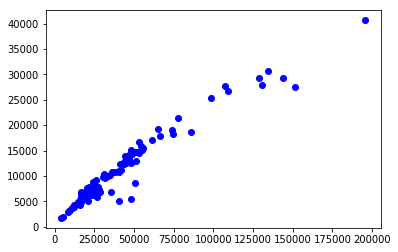

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(stats.length, stats.unique,"bo");

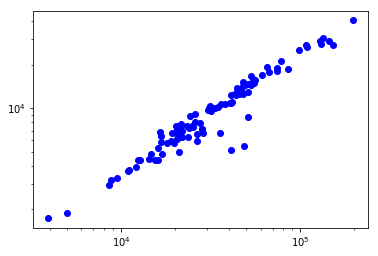

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.loglog(stats.length, stats.unique,"bo");

We can also stratify our data by language in pandas

In [115]:
stats[stats.language == "English"]

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449
6,English,Shakespeare,Romeo and Juliet,40776,5118
7,English,Shakespeare,The Merchant of Venice,20949,4978


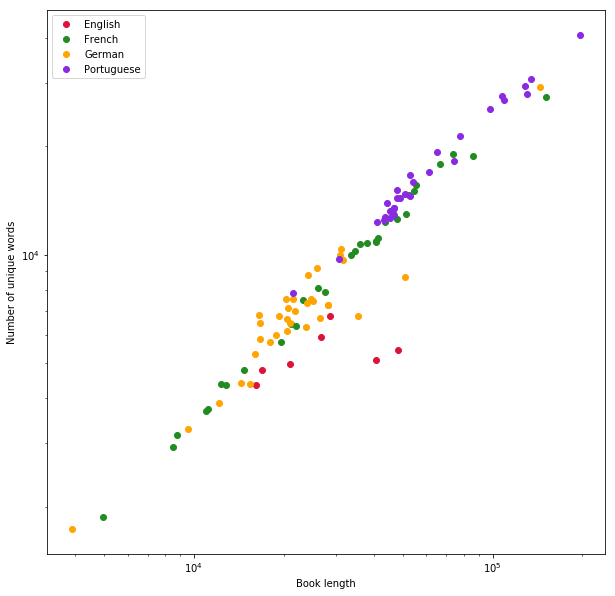

In [127]:
plt.figure(figsize=(10,10))

subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label = "English", color = "crimson")

subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label = "French", color = "forestgreen")

subset = stats[stats.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label = "German", color = "orange")

subset = stats[stats.language == "Portuguese"]
plt.loglog(subset.length, subset.unique, "o", label = "Portuguese", color = "blueviolet")

plt.legend()
plt.xlabel("Book length")
plt.ylabel("Number of unique words");
#plt.savefig("lang_plot.pdf")

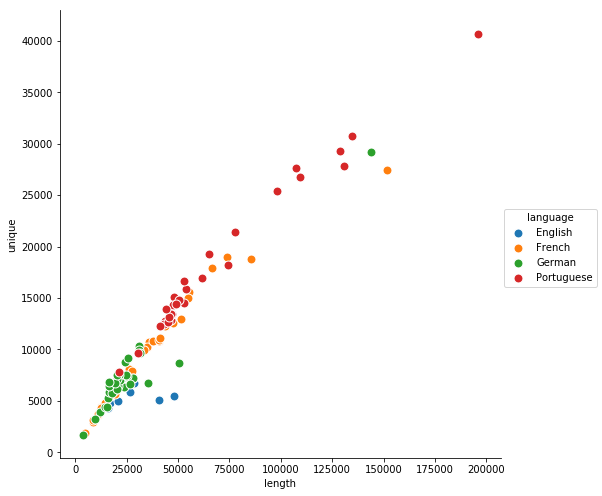

In [18]:
import seaborn as sns
g = sns.pairplot(x_vars=['length'], y_vars=['unique'], data=stats, hue='language', size=7) 
#g = g.map_offdiag(plt.scatter,  s=35,alpha=0.5);

In [ ]:
g = sns.pairplot(x_vars=['length'], y_vars=['unique'], data=stats, hue='language', size=7, plot_kws = {"s": 80}) # increase point size

# Homework

**Exercise 1**

In this case study, we will find and visualize summary statistics of the text of different translations of Hamlet. For this case study, functions count_words_fast, read_book, and word_stats are already defined as in the Case 2 Videos (Videos 3.2.x).

book_titles is a nested dictionary, containing book titles within authors within languages, all of which are strings. These books are all stored online, and are accessed throughout this case study. In this exercise, we will first read in and store each translation of Hamlet.


-  Define `hamlets` as a `pandas` dataframe with columns `language` and `text`.
-  Add an `if`statement to check if the title is equal to `'Hamlet'`.
-  Store the results from `read_book(inputfile)` to `text`.
-  Consider: How many translations are there? Which languages are they translated into? 
    Ans: There are three translations: English, German, and Portuguese.


In [ ]:
import pandas as pd
hamlets = pd.DataFrame(columns=("language","text"))
book_dir = "Books"
title_num = 1
for language in book_titles:
    for author in book_titles[language]:
        for title in book_titles[language][author]:
            if title == "Hamlet":
                inputfile = data_filepath+"Books/"+language+"/"+author+"/"+title+".txt"
                text = read_book(inputfile)
                hamlets.loc[title_num] = language, text
                title_num += 1

**Exercise 2**
In this exercise, we will summarize the text for a single translation of Hamlet in a `pandas` dataframe. The language and text of the first translation of Hamlet in `hamlets` is given in the code section.


-  Find the dictionary of word frequency in `text` by calling `count_words_fast()`. Store this as `counted_text`.
-  Create a `pandas` dataframe named `data`.
-  Using `counted_text`, define two columns in data:
    -  `word`, consisting of each unique word in `text`.
    -  `count`, consisting of the number of times each word in `word` is included in the text.


In [ ]:
import pandas as pd
language, text = hamlets.iloc[0]

counted_text = count_words_fast(text)
data = pd.DataFrame({'word': list(counted_text.keys()),'count': list(counted_text.values())})

**Exercise 3**
In this exercise, we will continue to define summary statistics for a single translation of Hamlet. The solution code from the previous section is already included here.

-  Add a column to `data` named `length`, defined as the length of each word.
-  Add another column named `frequency`, which is defined as follows for each word in data:
    -  If `count` > 10, frequency is `frequent`.
    -  If 1 < `count` <= 10, frequency is `infrequent`.
    -  If `count` == 1, frequency is `unique`.


In [ ]:
language, text = hamlets.iloc[0]

counted_text = count_words_fast(text)

data = pd.DataFrame({
    "word": list(counted_text.keys()),
    "count": list(counted_text.values())
})

# df['elderly'] = np.where(df['age']>=50, 'yes', 'no')
data['length'] = data.apply(lambda row: len(row.word), axis=1)
data.loc[data['count'] > 10,'frequency'] = 'frequent'
data.loc[((data['count'] > 1) & (data['count'] <= 10)),'frequency'] = 'infrequent'
data.loc[data['count'] == 1,'frequency'] = 'unique'

In [ ]:
# instructor solution
language, text = hamlets.iloc[0]

counted_text = count_words_fast(text)

data = pd.DataFrame({
    "word": list(counted_text.keys()),
    "count": list(counted_text.values())
})

data["length"] = data["word"].apply(len)

data.loc[data["count"] > 10,  "frequency"] = "frequent"
data.loc[data["count"] <= 10, "frequency"] = "infrequent"
data.loc[data["count"] == 1,  "frequency"] = "unique"


**Exercise 4**
In this exercise, we will summarize the statistics in data into a smaller pandas dataframe. The solution code from the previous section is already included here.

Create a pandas dataframe named `sub_data` including the following columns:

-  `language`, which is the language of the text.
-  `frequency`, which is a list containing the strings "frequent", "infrequent", and "unique".
-  `mean_word_length`, which is the mean word length of each value in frequency.
-  `num_words`, which is the total number of words in each frequency category.

In [ ]:
language, text = hamlets.iloc[0]

counted_text = count_words_fast(text)

data = pd.DataFrame({
    "word": list(counted_text.keys()),
    "count": list(counted_text.values())
})

data["length"] = data["word"].apply(len)

data.loc[data["count"] > 10,  "frequency"] = "frequent"
data.loc[data["count"] <= 10, "frequency"] = "infrequent"
data.loc[data["count"] == 1,  "frequency"] = "unique"

# Enter your code here.
#sub_data = pd.DataFrame(columns=("language","frequency","mean_word_length","num_words"))
sub_data = pd.DataFrame({
    "language": language,
    "frequency":  ["frequent","infrequent","unique"],
    "mean_word_length": data.groupby("frequency")["length"].mean(),
    "num_words": data.groupby("frequency")["count"].size()
})
sub_data

**Exercise 5**

In this exercise, we will join all the data summaries for text Hamlet translation.

The previous code for summarizing a particular translation of Hamlet is consolidated into a single function called `summarize_text`. Create a pandas dataframe `grouped_data` consisting of the results of `summarize_text` for translation of Hamlet in `hamlets`.

-  Use a `for` loop across the row indices of `hamlets` to assign each translation to a new row.
-  Obtain the `ith` row of `hamlets` to variables using the `.iloc` method, and assign the output to variables `language` and `text`.
-  Call `summarize_text` using `language` and `text`, and assign the output to `sub_data`.
-  Use the `pandas .append()` function to append to pandas dataframes row-wise to grouped_data.

In [ ]:
def summarize_text(language, text):
    counted_text = count_words_fast(text)

    data = pd.DataFrame({
        "word": list(counted_text.keys()),
        "count": list(counted_text.values())
    })
    
    data.loc[data["count"] > 10,  "frequency"] = "frequent"
    data.loc[data["count"] <= 10, "frequency"] = "infrequent"
    data.loc[data["count"] == 1,  "frequency"] = "unique"
    
    data["length"] = data["word"].apply(len)
    
    sub_data = pd.DataFrame({
        "language": language,
        "frequency": ["frequent","infrequent","unique"],
        "mean_word_length": data.groupby(by = "frequency")["length"].mean(),
        "num_words": data.groupby(by = "frequency").size()
    })

    return(sub_data)
    
grouped_data = pd.DataFrame({})
rowcount = 0;
for row in hamlets.iterrows():
    if rowcount in range(0,len(hamlets["language"])):
        language, text = hamlets.iloc[rowcount]
        rowcount += 1
        sub_data = summarize_text(language, text)   
        #print(sub_data)
        grouped_data = grouped_data.append(sub_data)
        grouped_data.index.name=None # couldn't have guessed this without the discussion forum !
        grouped_data["num_words"] = grouped_data.num_words.astype(float) # couldn't have guessed this without the discussion forum !
        
grouped_data


**Exercise 6**

In this exercise, we will plot our results and look for differences across each translation.


-  Plot the word statistics of each translations on a single plot. Note that we have already done most of the work for you.
-  Consider: do the word statistics differ by translation?


In [ ]:
colors = {"Portuguese": "green", "English": "blue", "German": "red"}
markers = {"frequent": "o","infrequent": "s", "unique": "^"}
import matplotlib.pyplot as plt
for i in range(grouped_data.shape[0]): # no. of rows in group_data
    row = grouped_data.iloc[i]
    plt.plot(row.mean_word_length, row.num_words,
        marker=markers[row.frequency],
        color = colors[row.language],
        markersize = 10
    )

color_legend = []
marker_legend = []
for color in colors:
    color_legend.append(
        plt.plot([], [],
        color=colors[color],
        marker="o",
        label = color, markersize = 10, linestyle="None")
    )
for marker in markers:
    marker_legend.append(
        plt.plot([], [],
        color="k",
        marker=markers[marker],
        label = marker, markersize = 10, linestyle="None")
    )
plt.legend(numpoints=1, loc = "upper left")

plt.xlabel("Mean Word Length")
plt.ylabel("Number of Words")
plt.show()

We see that the original English version of Hamlet contains fewer words overall, and its unique words are shorter than its translations. 

## Case study 3: Introduction to classification

If the response/dependent variable (result) of a supervised learning method is quantitative (e.g. weight), then the problem is called a **regression** problem. OTOH, qualitative problems (e.g. boolean) are called **classification** problems.

### K-nearest neighbour classifier (kNN)


In [24]:
import numpy as np

def distance(p1,p2):
    """
    Find distance between points p1 and p2
    """
    return np.sqrt(np.sum(np.power((p2-p1),2)))

p1 = np.array([1,1])
p2 = np.array([4,4])
distance(p1,p2)

4.2426406871192848

In [26]:
import random
def majority_vote(votes):
    """
    Return the most common element in votes
    """

    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    winners=[]
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)

    return random.choice(winners)

votes = [1,2,3,1,3,2,3,3,3]
winner = majority_vote(votes)
winner



3

In [10]:
import scipy.stats as ss

def majority_vote_short(votes):
    """
    Return the most common element in votes
    """

    mode, count = ss.mstats.mode(votes)

    return mode

votes = [1,2,3,1,3,2,3,3,3]
winner = majority_vote_short(votes)
winner



array([ 3.])

The majority_vote function is still preferred bcoz it gives an option to pick one random majority vote in case of >1 majority winners

In [44]:
import random
random.choice([4])

4

Given a set of point space, can we find the nearest K neighbours of a given point ?

[0.5, 4, 0.5, 4]

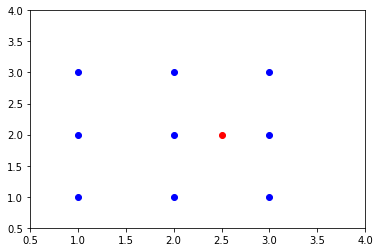

In [19]:
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]]) # point space
p = np.array([2.5, 2]) # point for which we want to find nearest neighbours
plt.plot(points[:,0], points[:,1],"bo")
plt.plot(p[0],p[1], "ro")
plt.axis([0.5,4,0.5,4])

In [22]:
distances = np.zeros(points.shape[0]) # just get the first column of shape returned 2D array. This is a dummy empty list created to populate with actual distances below
#test = np.zeros(points.shape)
#distances
#test

for i in range(len(distances)):
    distances[i] = distance(p, points[i])

distances

NameError: name 'p' is not defined

From the list of distances returned above, we need to sort them in ascending order to find those  (say 2) points that have the smallest distance. Thankfully, numpy has `argsort` for this

In [10]:
def find_nearest_neighbours(p, points, k=5):
    """ Find the k nearest neighbours of point p and return their indices"""
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbours(p, points, k)
    return majority_vote(outcomes[ind])

In [31]:
outcomes = np.array([0,0,0,0,1,1,1,1,1]) # what group each of the 9 points belong to. So based on its distance our query point could then be classified as one group or other
knn_predict(np.array([2.5,2.7]), points, outcomes, k=2)
knn_predict(np.array([1.0,2.7]), points, outcomes, k=2)

1

0

In [34]:
(np.zeros(points.shape[0]))
(np.zeros(points.shape))

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

# Generating synthetic data

Why ? You know exactly how the data were generated so you know what to expect when testing code.

Lets generate synthetic bivariate data (i.e. computer generated data beloning to either of two variables - group/class 1 or 0)

In [5]:
from scipy import stats as ss
import numpy as np
# generate 5-rows and 2-cols data using scipy norm function for first class with mean 0 and std dev 1 (normal distribution)
ss.norm(0,1).rvs((5,2))

# same for the second class except with mean of 1 i.e. getting a different distribution
ss.norm(1,1).rvs((5,2))

array([[ 1.38898247,  0.71649133],
       [ 0.90943954, -1.73736741],
       [ 0.45005084, -0.48659579],
       [-0.01018545, -0.76399927],
       [ 0.6985411 , -0.98213853]])

array([[  2.10935874e+00,   8.33271494e-01],
       [  3.15892107e+00,  -2.63167996e-05],
       [  1.57041889e+00,   5.98982724e-01],
       [  1.88377263e+00,   1.94455085e+00],
       [  5.54368822e-01,   1.94463193e+00]])

Explanation of `ss.norm(0,1).rvs((5,2))` 

norm = normal distribution given mean and standard deviation (0 and 1, respectively, in the given example)

.rvs = random variables given dimensions (5 rows and 2 columns, as you point out)

So essentially, you are asking for a table of randomly selected numbers fitting the specified normal distribution. 

Concatanate the two arrays by rows (i.e. axis 0)

In [6]:
np.concatenate((ss.norm(0,1).rvs((5,2)), ss.norm(1,1).rvs((5,2))), axis =0)

array([[ 1.00925517,  0.7098674 ],
       [ 0.39054135,  0.42830665],
       [ 0.47080923, -0.28051162],
       [-0.20644765,  1.06153983],
       [ 1.06775025,  0.1868666 ],
       [ 0.01554987,  1.48634131],
       [-0.80207791,  1.6264883 ],
       [ 0.65738114,  1.09708334],
       [ 2.40515962,  2.20491866],
       [ 0.7053263 ,  1.91204237]])

Now lets convert above steps to a function.

In [7]:
def generate_synth_data(n=50):
    """Create two sets of points from bivariate normal distributions"""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis =0)
    outcomes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))
    return(points,outcomes)

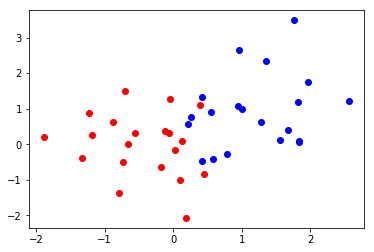

In [9]:
n = 20

(points, outcomes)=generate_synth_data(n)
plt.plot(points[:n,0], points[:n,1], "ro") # grp 1 points are the first n observations (i.e. rows) x-value in first col and y-value in second col
plt.plot(points[n:, 0], points[n:,1], "bo")

# Prediction Grid

In [17]:
def make_prediction_grid(predictors,outcomes,limits, h, k):
    """Classify each pt on the prediction grid"""
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h) # h = stepsize
    ys = np.arange(y_min, y_max, h)
    xx,yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype= int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
            
    return(xx, yy, prediction_grid)

how does `enumerate` work ?

In [13]:
season = ["spring","summer","winter","fall"]
list(enumerate(season))

for idx,season in enumerate(season):
    print(idx,"--",season)

[(0, 'spring'), (1, 'summer'), (2, 'winter'), (3, 'fall')]

0 -- spring
1 -- summer
2 -- winter
3 -- fall


The value of `k` controls the smoothness of the fit (i.e. decision boundary), where the larger the value of k, the smoother the fit.

**NOTE** : The script `plot_prediction_grid.py` is provided by the instructors

In [15]:
(predictors,outcomes) = generate_synth_data()
predictors.shape
outcomes.shape

(100, 2)

(100,)

In [31]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

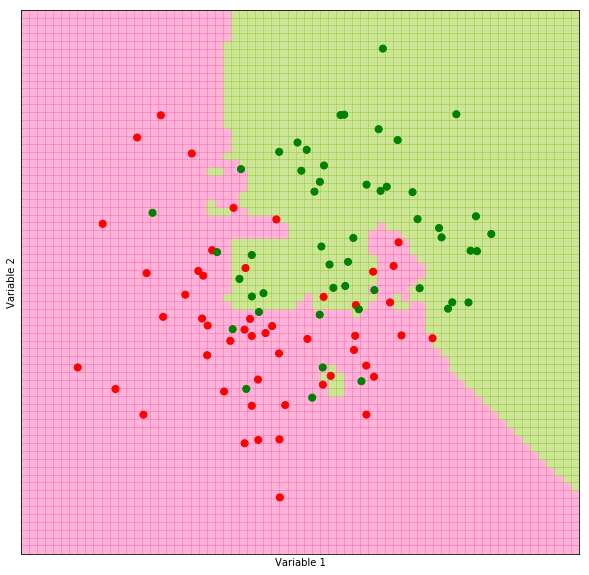

In [32]:
k=5; filename="knn_synth_5.pdf" ;limits= (-3,4,-3,4); h=0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h ,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)
# %run -i files/plot_prediction_grid.py --flag1 xx --flag2 yy --flag3 prediction_grid --flag4 filename

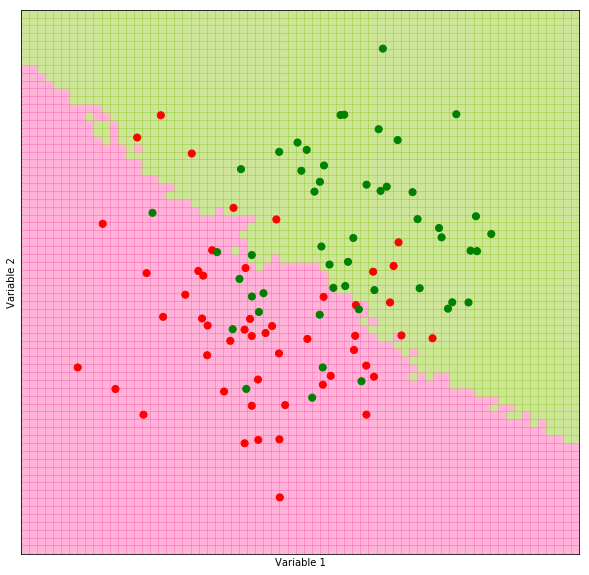

In [33]:
k=50; filename="knn_synth_50.pdf" ;limits= (-3,4,-3,4); h=0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h ,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)
# %run -i files/plot_prediction_grid.py --flag1 xx --flag2 yy --flag3 prediction_grid --flag4 filename

As you can see in the images above, the decision boundary for k=50 is a lot smoother than that of k=5. Even so, it is not wise to go with an extremely large (or small) k value for your predictions (bias-variance tradeoff), because utltimately it really doesn't matter how well your method performs on the training set, what matters is its performance on the test dataset. Hence, intermediate values of k might actually be the best

Lets now apply the KNN method using iris dataset (50 observations each of sepal length, sepal width, petal length, petal width from 3 different flowers (total 150 observations))

In [35]:
from sklearn import datasets
iris = datasets.load_iris()

In [36]:
iris["data"] # lets take a peek at the data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

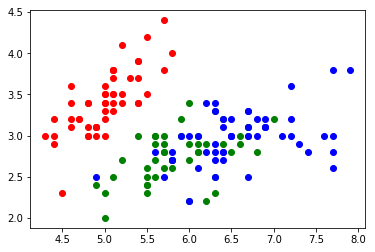

In [37]:
predictors = iris.data[:,0:2] # lets take a subset of just the covariates or predictors (sepal lenght and width)
outcomes = iris.target
plt.plot(predictors[outcomes == 0][:,0],predictors[outcomes == 0][:,1],"ro")
plt.plot(predictors[outcomes == 1][:,0],predictors[outcomes == 1][:,1],"go")
plt.plot(predictors[outcomes == 2][:,0],predictors[outcomes == 2][:,1],"bo")

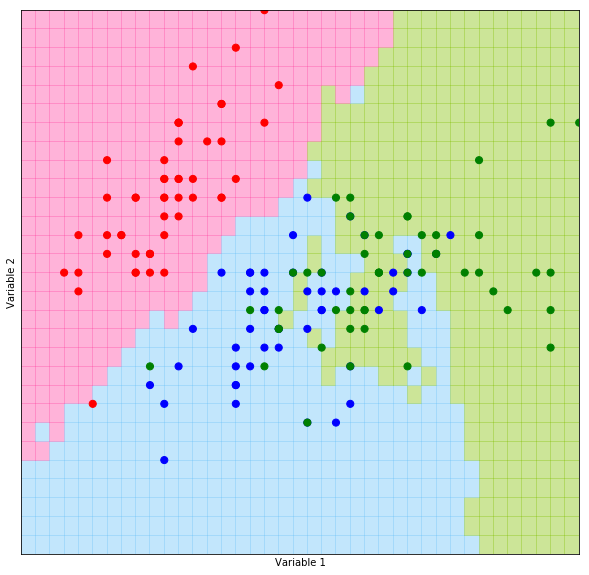

In [38]:
k=5; filename="iris_grid.pdf" ;limits= (4,8,1.5,4.5); h=0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h ,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)
# %run -i files/plot_prediction_grid.py --flag1 xx --flag2 yy --flag3 prediction_grid --flag4 filename

Running predictions using scikit-learn as well as our own made function

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors,outcomes)
sk_predictions = knn.predict(predictors)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [44]:
sk_predictions.shape
sk_predictions[0:10]

(150,)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
# our function
my_predictions = np.array([knn_predict(p, predictors, outcomes,5) for p in predictors])
my_predictions.shape

(150,)

Lets compare the predictions we got from scikit-learn with our function

In [47]:
sk_predictions == my_predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [49]:
(np.mean(sk_predictions == my_predictions))*100 # true will be evaluated as 1, False as 0

96.0

So our predictions agree 96% of the time !
We can also ask how frequently do my predictions and SciKit predictions agree with the actual observed outcomes.

In [50]:
(np.mean(sk_predictions == outcomes))*100 
(np.mean(my_predictions == outcomes))*100 

83.333333333333343

84.666666666666671

# HW

## Exercise 1

In this case study, we will analyze a dataset consisting of an assortment of wines classified as "high quality" and "low quality" and will use the k-Nearest Neighbors classifier to determine whether or not other information about the wine helps us correctly predict whether a new wine will be of high quality.

Our first step is to import the dataset.

Read in the data as a pandas dataframe using `pd.read_csv`. The data can be found at https://s3.amazonaws.com/demo-datasets/wine.csv.

In [51]:
import pandas as pd
#data = pd.read_csv('/Users/nsarode/Documents/python/edx_PH526x/files/wine.csv')
import io
import requests
url="https://s3.amazonaws.com/demo-datasets/wine.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))

##Exercise 2

In this case study, we will analyze a dataset consisting of an assortment of wines classified as "high quality" and "low quality" and will use the k-Nearest Neighbors classifier to determine whether or not other information about the wine helps us correctly predict whether a new wine will be of high quality.

Next, we will inspect the dataset and perform some mild data cleaning.


-  Print the first 5 rows of data using the `head()` method.
-  The dataset remains stored as data. Two columns in data are `is_red` and `color`, which are redundant. Drop `color` from the dataset, and save the new dataset as `numeric_data`.


In [52]:
data.head(n=5)
numeric_data = data.drop(['color'], axis = 1)
numeric_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0


We want to ensure that each variable contributes equally to the kNN classifier, so we will need to scale the data by subtracting the mean of each column and dividing each column by its standard deviation. Then, we will use principal components to take a linear snapshot of the data from several different angles, with each snapshot ordered by how well it aligns with variation in the data. In this exercise, we will scale the numeric data and extract the first two principal components.

-  Scale the data using the `sklearn.preprocessing` function `scale()` on `numeric_data`.
-  Convert this to a pandas dataframe, and store as `numeric_data`.
    -  Include the numeric variable names using the parameter `columns = numeric_data.columns`.
-  Use the `sklearn.decomposition` module `PCA()`, and store this as `pca`.
-  Use the `fit_transform()` function to extract the first two principal components from the data, and store this as `principal_components`

In [ ]:
from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler
scaled_data = preprocessing.scale(numeric_data)

#scaled_data = StandardScaler().fit_transform(numeric_data)
numeric_data = pd.DataFrame(scaled_data, columns=numeric_data.columns)

#from sklearn import decomposition
from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
pca = PCA()
#pca.fit(numeric_data)
#principal_components = pca.transform(numeric_data)

principal_components = (pca.fit_transform(numeric_data))[:,:2]
#principal_components = principal_components[:2]
principal_components.shape
#pca.fit(numeric_data)
#principal_components = pca.transform(numeric_data)


## Exercise 4

In this exercise, we will plot the first two principal components of the covariates in the dataset. The high and low quality wines will be colored using red and blue.

-  The first two principal components can be accessed using `principal_components[:,0]` and `principal_components[:,1]`. Store these as `x` and `y` respectively, and plot the first two principal components.
-  Consider: how well are the two groups of wines separated by the first two principal components?


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.backends.backend_pdf import PdfPages
observation_colormap = ListedColormap(['red', 'blue'])
x = principal_components[:,0]
y = principal_components[:,1]

plt.title("Principal Components of Wine")
plt.scatter(x, y, alpha = 0.2,
    c = data['high_quality'], cmap = observation_colormap, edgecolors = 'none')
plt.xlim(-8, 8); plt.ylim(-8, 8)
plt.xlabel("Principal Component 1"); plt.ylabel("Principal Component 2")
plt.show()

# The two groups of wine quality appear to separate significantly

In [ ]:
array([ 3.9084047 ,  3.89513343,  3.85128606, ..., -0.8829393 ,
       -1.55345605, -1.36831171])
array([ 0.18449225,  0.70607678,  0.47524455, ..., -0.16735573,
       -3.97949648, -2.07368096])

## Exercise 5

In this exercise, we will create a function that calculates the accuracy between predictions and outcomes.


-  Create a function `accuracy(predictions, outcomes)` that takes two lists of the same size as arguments and returns a single number, which is the percentage of elements that are equal for the two lists.
-  Use `accuracy` to compare the percentage of similar elements in `x = np.array([1,2,3])` and `y = np.array([1,2,4])`.
-  Print your answer.


In [ ]:
def accuracy(predictions, outcomes):
    per = (np.mean(predictions == outcomes))*100
    return per

x = np.array([1,2,3])
y = np.array([1,2,4])

per = accuracy(x, y)
print(per)

# Exercise 6

The dataset remains stored as data. Because most wines in the dataset are classified as low quality, one very simple classification rule is to predict that all wines are of low quality. In this exercise, we determine the accuracy of this simple rule. The `accuracy()` function preloaded into memory as defined in Exercise 5.


-  Use `accuracy()` to calculate how many wines in the dataset are of low quality. Do this by using `0` as the first argument, and `data["high_quality"]` as the second argument.
-  Print your result.


In [ ]:
per = accuracy(0,data["high_quality"])
print(per)

#Exercise 7

In this exercise, we will use the kNN classifier from scikit-learn to predict the quality of wines in our dataset.


-  Use `knn.predict(numeric_data)` to predict which wines are high and low quality and store the result as `library_predictions`.
-  Use `accuracy` to find the accuracy of your predictions, using `library_predictions` as the first argument and `data["high_quality"]` as the second argument.
-  Print your answer. Is this prediction better than the simple classifier in Exercise 6?


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(numeric_data, data['high_quality'])
library_predictions = knn.predict(numeric_data)
per = accuracy(library_predictions,data["high_quality"])
print(per)

#Exercise 8

Unlike the `scikit-learn` function, our homemade kNN classifier does not take any shortcuts in calculating which neighbors are closest to each observation, so it is likely too slow to carry out on the whole dataset. In this exercise, we will select a subset of our data to use in our homemade kNN classifier.

To circumvent this, fix the random generator using `random.seed(123)`, and select 10 rows from the dataset using `random.sample(range(n_rows), 10)`. Store this selection as `selection`.

In [ ]:
random.seed(123)
n_rows = data.shape[0]

selection = random.sample(range(n_rows), 10)


#Exercise 9

We are now ready to use our homemade `kNN classifier` and compare the accuracy of our results to the baseline. The sample of 10 row indices are stored as `selection` from the previous exercise.


-  For each predictor `p` in `predictors[selection]`, use `knn_predict(p, predictors[training_indices,:], outcomes, k=5)` to predict the quality of each wine in the prediction set, and store these predictions as a `np.array` called `my_predictions`. Note that `knn_predict` is already defined as in the Case 3 videos.
-  Using the `accuracy` function, compare these results to the selected rows from the high_quality variable in data using `my_predictions` as the first argument and `data.high_quality[selection]` as the second argument. Store these results as `percentage`.
-  Print your answer.


In [ ]:
import numpy as np
predictors = np.array(numeric_data)
training_indices = [i for i in range(len(predictors)) if i not in selection]
outcomes = np.array(data["high_quality"])

my_predictions = []
for p in predictors[selection]:
    knn_predictions = (knn_predict(p, predictors[training_indices,:], outcomes, k=5))
    my_predictions.append(knn_predictions)
    print(my_predictions)

percentage = accuracy(np.array(my_predictions),data.high_quality[selection])    
print(percentage)
#Our accuracy is comparable to the library's function! 